In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#combat(dat, batch, mod, numCovs=None)

found 5 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


430.456177145
90.7908311794


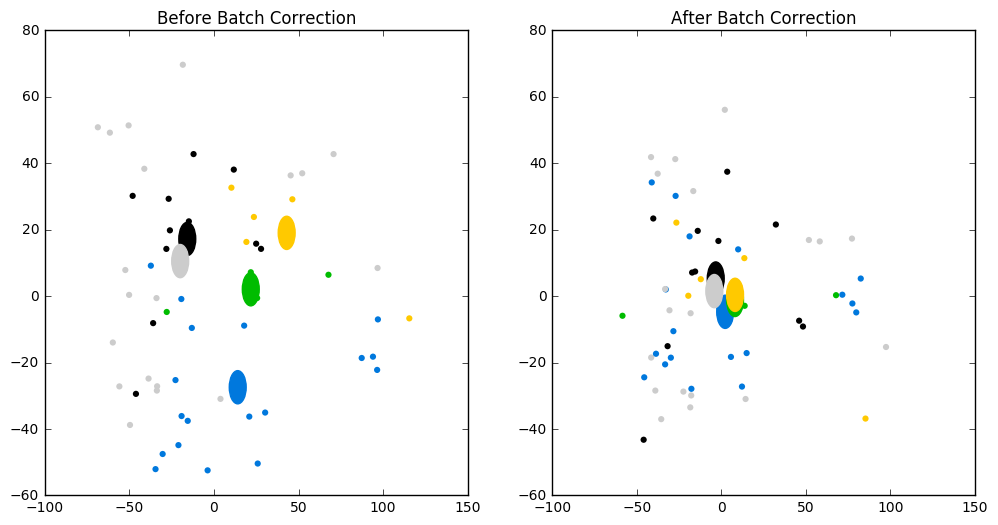

In [27]:
from sklearn import decomposition
from sklearn import datasets
import matplotlib as mpl
import matplotlib.cm as cm
import combat as cb
from scipy.spatial.distance import pdist

np.random.seed(314)


def make_pca_plot(X, y, axis, title=""):
    
    # reduce gene matrix to 2 dimensions for plotting
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X_trans = pca.transform(X)

    # find nice colors and plot
    

    
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    m = cm.ScalarMappable(norm=norm, cmap=cm.spectral)
    axis.scatter(X_trans[:, 0], X_trans[:, 1], c=m.to_rgba(y), edgecolor='none')

    # find batch centers and plot them
    all_batch_reps = []
    for val in np.unique(y):
        Z = X_trans[y==val, : ]
        Z = X_trans[np.ix_((y==val))]
        rep = np.mean(Z, axis=0)
        all_batch_reps.append(rep)
        axis.add_artist(plt.Circle(rep, 5, color=m.to_rgba(val)))
    axis.set_title(title)
    legend(numpoints=1)


    # get total distance between all batch representatives
    all_batch_reps = np.array(all_batch_reps)
    
    return np.sum(pdist(all_batch_reps))
    
    
data = pd.read_csv("bladder-expr.txt", sep="\t")
pheno = pd.read_csv("bladder-pheno.txt", sep="\t")

corr = cb.combat(data, pheno["batch"])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
total_batch_dist = make_pca_plot(data.values.T, pheno["batch"], ax1, "Before Batch Correction")
total_batch_dist_corr = make_pca_plot(corr.values.T, pheno["batch"], ax2, "After Batch Correction")

print(total_batch_dist)
print(total_batch_dist_corr)

plt.show()